In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics, neighbors
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

In [2]:
df_knn = pd.read_csv("Clean Data/prep_dataset_20230429.csv", low_memory=False)

In [3]:
df_knn.columns

Index(['unique_identifier', 'usage', 'usage_range', 'PA', 'IL', 'TX', 'OH',
       'MA', 'MD', 'NJ', 'NY', 'CT', 'B2B_ACCOUNTING_EXPENSE_CODE',
       'B2B_ADVERTISING_EXPENSE_CODE', 'B2B_BIG_BUSINESS_INDICATOR', 'g_grow',
       's_grow', 'c_grow', 'B2B_BUSINESS_SQUARE_FOOT_NUM',
       'B2B_COMPUTER_EXPENSE_CODE', 'B2B_CONTRACT_LABOR_EXPENSE_CODE',
       'B2B_CREDIT_GRADE', 'B2B_EMPLOYEE_SIZE', 'B2B_EXPENSE_TYPE',
       'B2B_HIGH_TECH_FLAG', 'B2B_INSURANCE_EXPENSE_CODE',
       'B2B_LEGAL_EXPENSE_CODE', 'B2B_MEDIUM_SIZE_FLAG',
       'B2B_MULTI_TENANT_DESCRIP', 'B2B_PAYROLL_EXPENSE_CODE',
       'production_year', 'B2B_PURCHASE_ADMIN_EXPENSE_CODE',
       'B2B_PURCHASE_PRINT_EXPENSE_CODE', 'B2B_REST_LEASE_EXPENSE_CODE',
       'B2B_SALES_VOLUME', 'B2B_SMALL_SIZE_FLAG',
       'B2B_TELECOMMUNICATIONS_CODE', 'B2B_TENANT_FLAG', 'B2B_UTILITY_CODE',
       'B2B_WHITE_COLLAR_FLAG', 'Business_and_Finance', 'General_Merchandise',
       'Hotels_and_Educational_Boarding', 'Personal_Services

In [4]:
# Setting independent variables
X_knn = df_knn.iloc[:,3:].copy()
X_knn

,PA,IL,TX,OH,MA,MD,NJ,NY,CT,B2B_ACCOUNTING_EXPENSE_CODE,...,Hotels_and_Educational_Boarding,Personal_Services,Auto,Food_and_Dining,Amusement_and_Recreation_Services,Wholesale,Blue_Collar_Work,Manufacturing,Public_Health_and_Social_Services,Real_Estate
0,1,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29386,0,0,1,0,0,0,0,0,0,4,...,0,0,0,0,0,1,0,0,0,0
29387,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
29388,0,0,0,0,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
29389,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [5]:
# Setting dependent variables
y_knn = df_knn['usage_range'].astype('str').copy()

In [6]:
#Split into train and test
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3)

In [7]:
knn = KNeighborsClassifier(leaf_size = 5, n_neighbors=40, metric= 'manhattan')

# Train the model
knn.fit(X_train_knn, y_train_knn)

# Make predictions
y_pred_knn = knn.predict(X_test_knn)

# Evaluate the model
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print("Accuracy:", accuracy_knn)

Accuracy: 0.38353368110682695


In [10]:
y_predict_train = knn.predict(X_train_knn)
print(accuracy_score(y_train_knn,y_predict_train))

0.4262382734652214


In [8]:
print(classification_report(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           1       0.42      0.54      0.47      2254
           2       0.37      0.40      0.38      2322
           3       0.28      0.20      0.23      1646
           4       0.39      0.39      0.39      1566
           5       0.43      0.31      0.36      1030

    accuracy                           0.38      8818
   macro avg       0.38      0.37      0.37      8818
weighted avg       0.38      0.38      0.38      8818



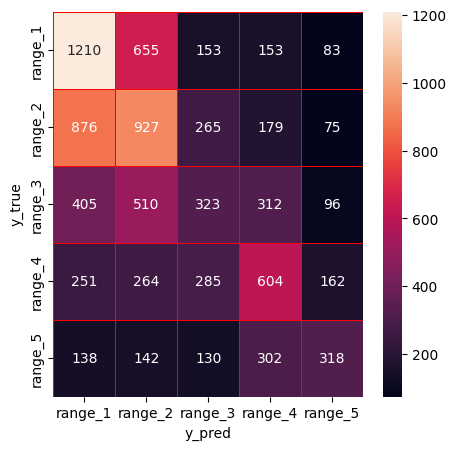

In [9]:
range_name = ['range_1', 'range_2', 'range_3', 'range_4', 'range_5']
f, ax =plt.subplots(figsize = (5,5))
cm= pd.DataFrame(confusion_matrix(y_test_knn, y_pred_knn), columns=range_name, index=range_name)
sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
